# Testing the training models

In [1]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2
import imutils
import imageio
from imutils import paths

In [2]:
!cd yolov5 && python val.py --batch-size 16 --data data.yaml --weights ../results/exp/weights/best.pt --img 640

val: data=data.yaml, weights=['../results/exp/weights/best.pt'], batch_size=16, imgsz=640, conf_thres=0.001, iou_thres=0.6, task=val, device=, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False
YOLOv5 🚀 v6.0-25-g15e8c4c torch 1.9.1+cu102 CUDA:0 (NVIDIA GeForce GTX 980, 4040.6875MB)

Fusing layers... 
Model Summary: 213 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
val: Scanning '../dataset/valid/labels.cache' images and labels... 220 found, 0 
val: Scanning '../dataset/valid/labels.cache' images and labels... 220 found, 0 
val: Scanning '../dataset/valid/labels.cache' images and labels... 220 found, 0 

               Class     Images     Labels          P          R     mAP@.5 mAP@
               Class     Images     Labels          P          R     mAP@.5 mAP@
               Class     Images     Labels          P          R     mAP@.5 mAP@
               Cla

In [3]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='results/exp/weights/best.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to /home/igor/.cache/torch/hub/master.zip
YOLOv5 🚀 2021-10-22 torch 1.9.1+cu102 CUDA:0 (NVIDIA GeForce GTX 980, 4040.6875MB)

Fusing layers... 
Model Summary: 213 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


In [4]:
test_set = "test"

In [5]:
img_to_pred = list(paths.list_images(test_set))

In [6]:
test = model(img_to_pred[:])    

In [7]:
test.save()

Saved 10 images to runs/detect/exp


In [8]:
results ='runs/detect/exp'
pathImages = list(paths.list_images(results))

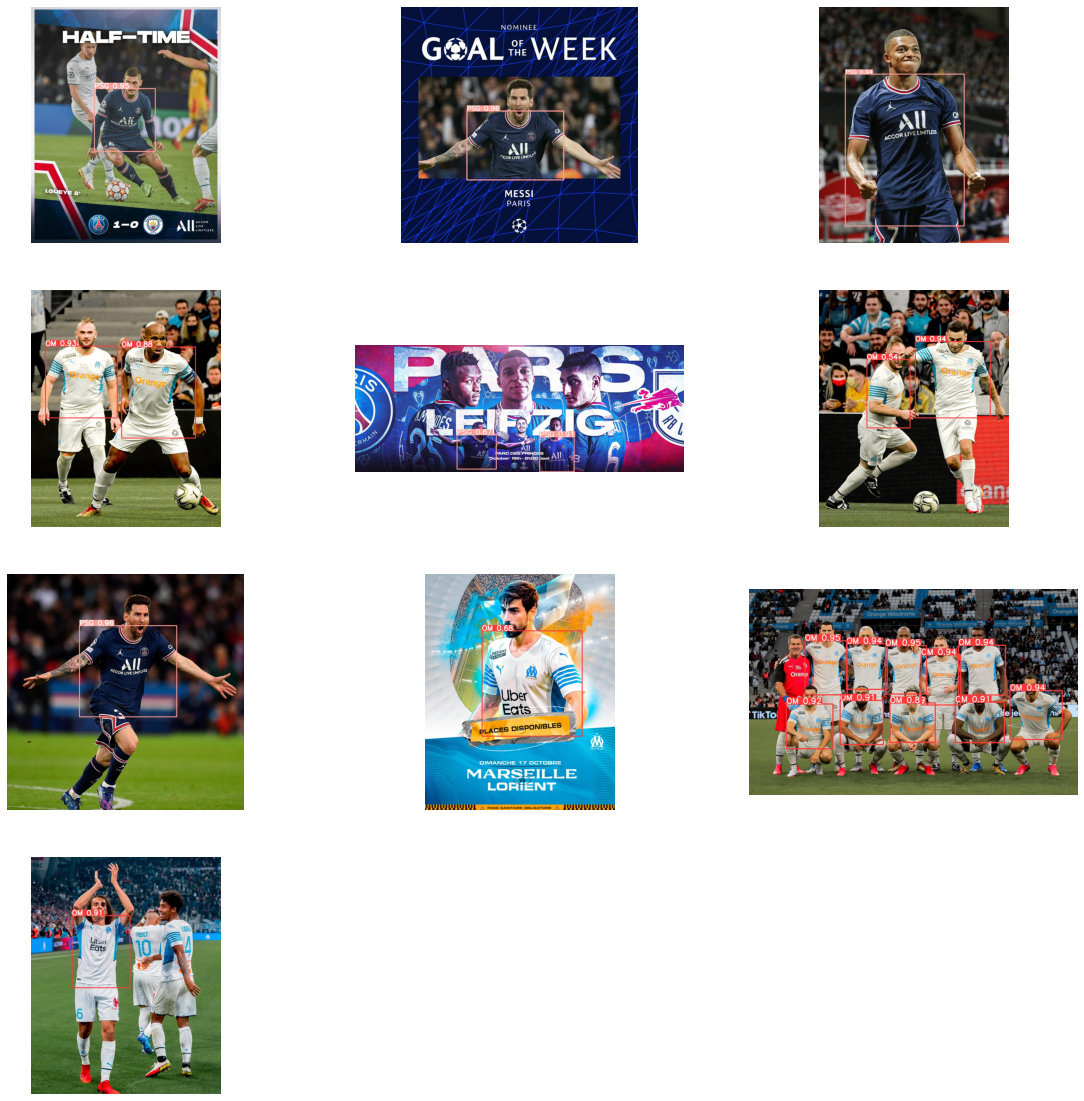

In [9]:
%matplotlib inline
plt.figure(figsize=(20,20))
count = 1
for i in pathImages:
    
    img = cv2.imread(i)
    #cv2.imshow('pred', img)
    #cv2.waitKey(0)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    ax = plt.subplot(4, 3, count)
    plt.imshow(img)
    plt.axis("off")
    count += 1
plt.savefig("test_sample.jpg")
plt.show()
cv2.destroyAllWindows()

## Testing on the video

In [10]:
cap = cv2.VideoCapture("video/video_test.mp4")
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    frame = imutils.resize(frame, width=1000, height=1800)
    results = model(frame)
    
    cv2.imshow('OMxPSG Yolo', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
    
cap.release()
cv2.destroyAllWindows()

QObject::moveToThread: Current thread (0x55fbd5e65b60) is not the object's thread (0x55fbd6691ab0).
Cannot move to target thread (0x55fbd5e65b60)

QObject::moveToThread: Current thread (0x55fbd5e65b60) is not the object's thread (0x55fbd6691ab0).
Cannot move to target thread (0x55fbd5e65b60)

QObject::moveToThread: Current thread (0x55fbd5e65b60) is not the object's thread (0x55fbd6691ab0).
Cannot move to target thread (0x55fbd5e65b60)

QObject::moveToThread: Current thread (0x55fbd5e65b60) is not the object's thread (0x55fbd6691ab0).
Cannot move to target thread (0x55fbd5e65b60)

QObject::moveToThread: Current thread (0x55fbd5e65b60) is not the object's thread (0x55fbd6691ab0).
Cannot move to target thread (0x55fbd5e65b60)

QObject::moveToThread: Current thread (0x55fbd5e65b60) is not the object's thread (0x55fbd6691ab0).
Cannot move to target thread (0x55fbd5e65b60)

QObject::moveToThread: Current thread (0x55fbd5e65b60) is not the object's thread (0x55fbd6691ab0).
Cannot move to tar

## Making video

In [11]:
reader = imageio.get_reader('video/video_test.mp4')
fps = reader.get_meta_data()['fps']
writer = imageio.get_writer('video/output.mp4', fps = fps)
print(fps)

30.18


In [12]:
for i, frame in enumerate(reader):
    # Make detections 
    results_v = model(frame)
    writer.append_data(np.squeeze(results_v.render()))
    #writer.append_data(frame)
writer.close()